In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction/data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [4]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [5]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [6]:
df.shape

(294, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

# Data Cleaning 

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [9]:
# replacing '?' with nan

df.replace('?' , np.nan  , inplace = True )

In [10]:
# checking for null value
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

##### We can drop the slope, ca, and thal columns as they contain too many null values.

In [11]:
df.drop(['slope' , 'ca' , 'thal'] , axis = 1 , inplace = True)


In [12]:
columns = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang']
for i in columns : 
    df[i] = pd.to_numeric(df[i]  , errors = 'coerce')

In [13]:
columns  = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang']
for i in columns : 
    df[i] = df[i].fillna(df[i].median())

<Axes: >

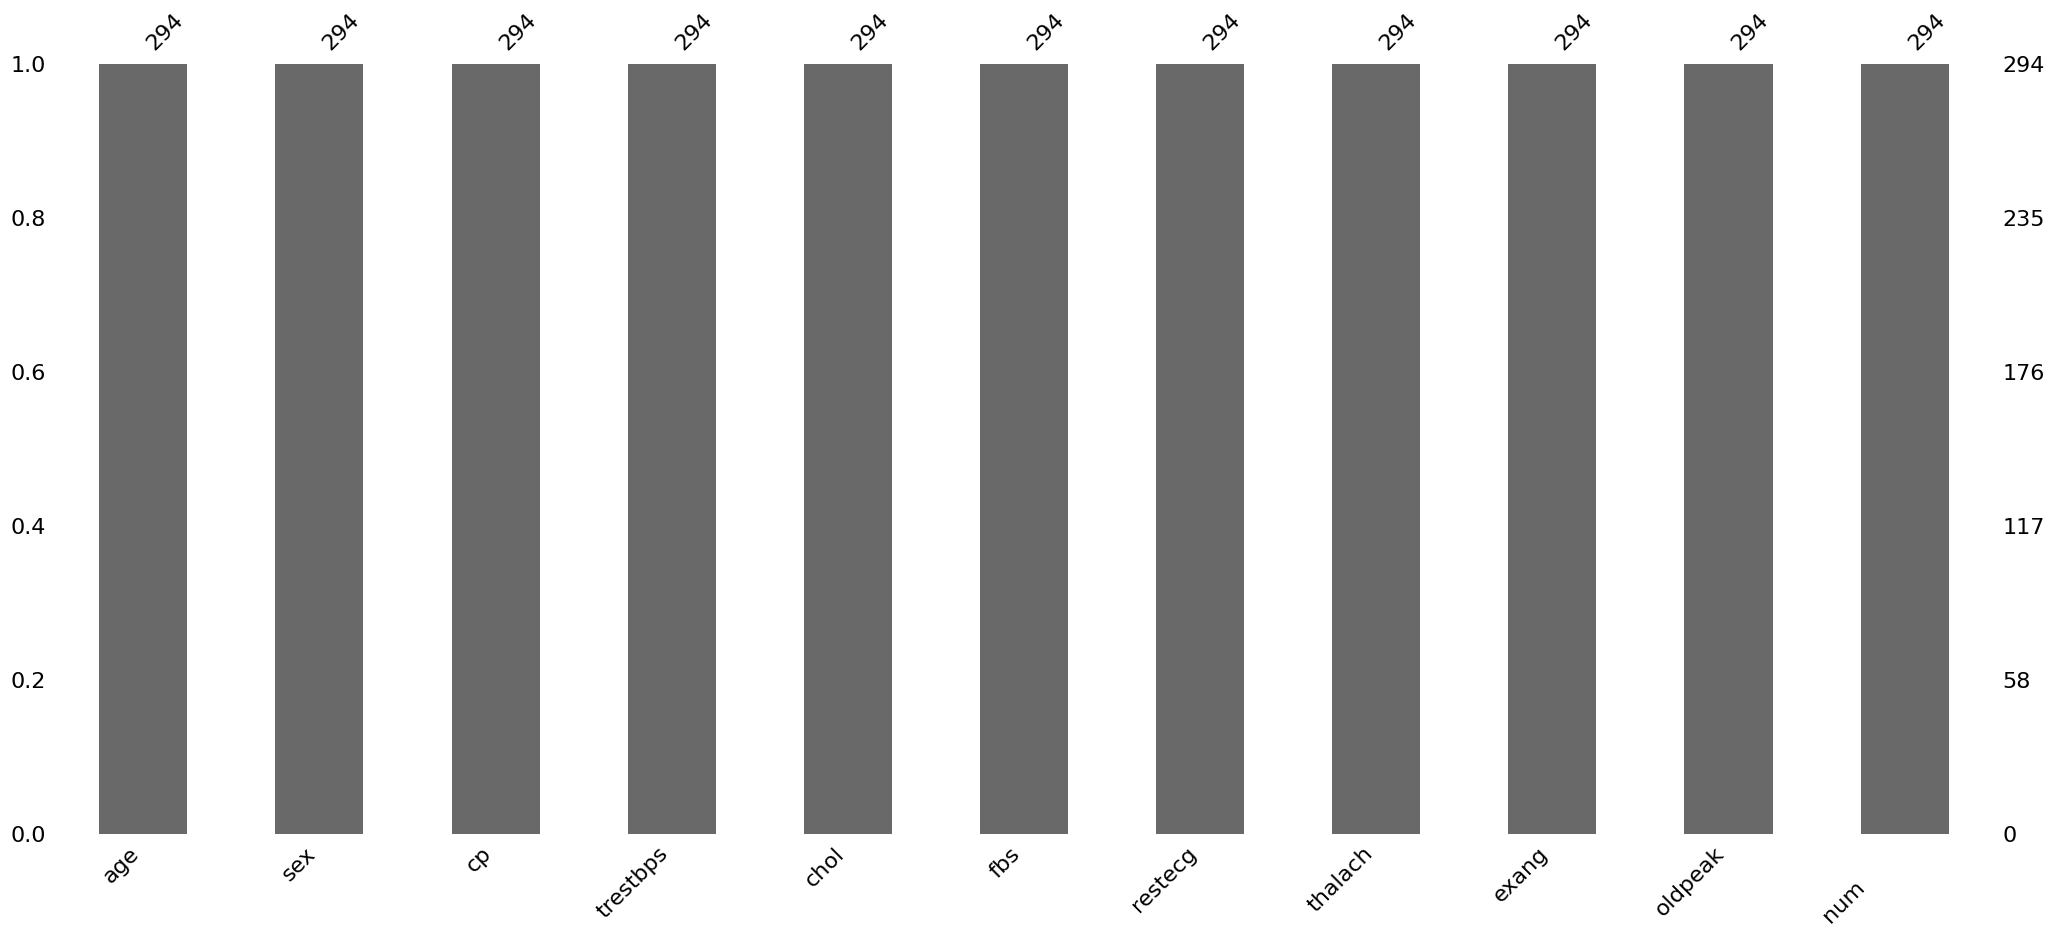

In [14]:
# dataset is now cleaned 
msno.bar(df)

# Exploratory Data Analysis (EDA)

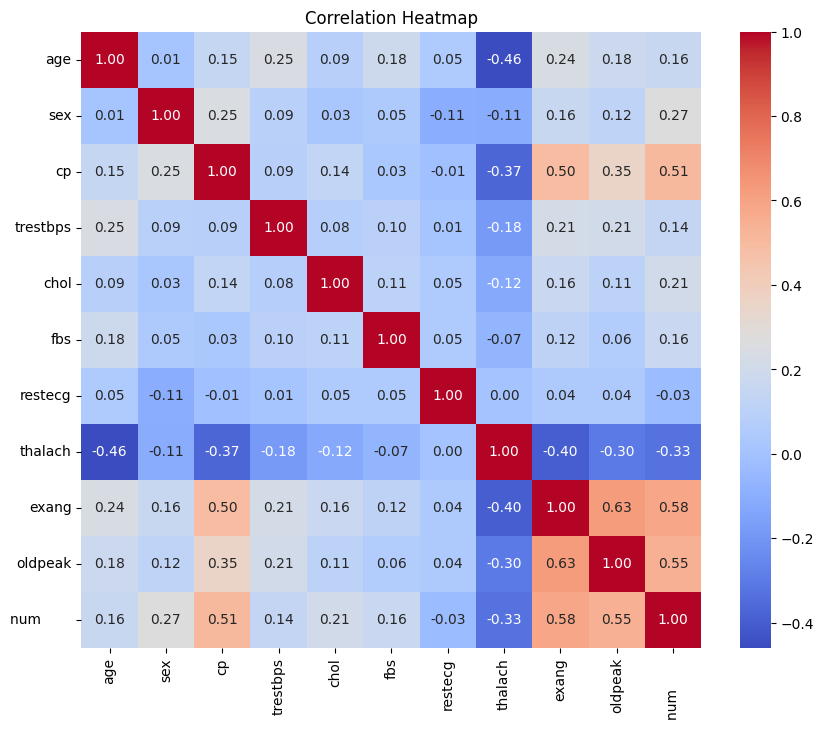

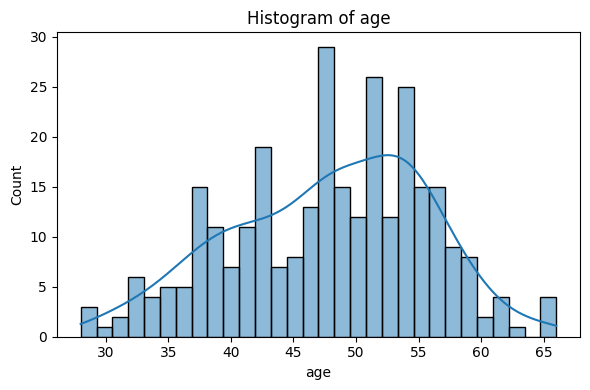

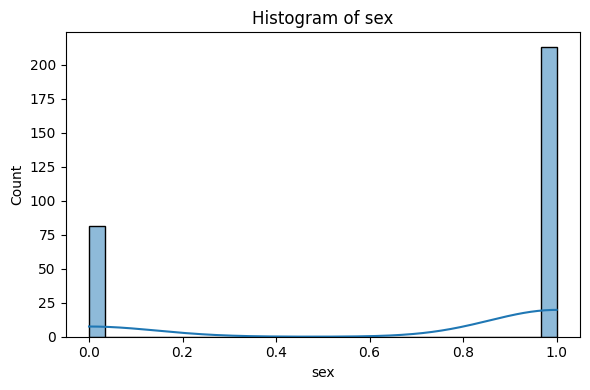

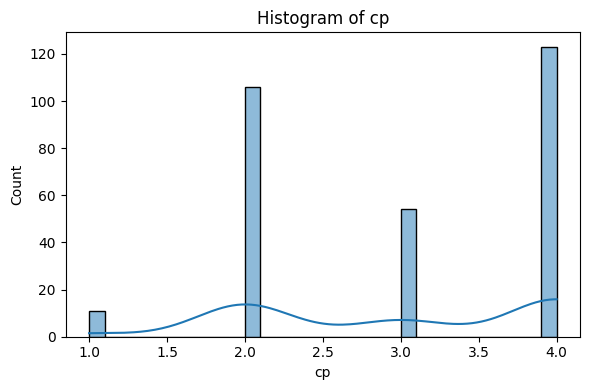

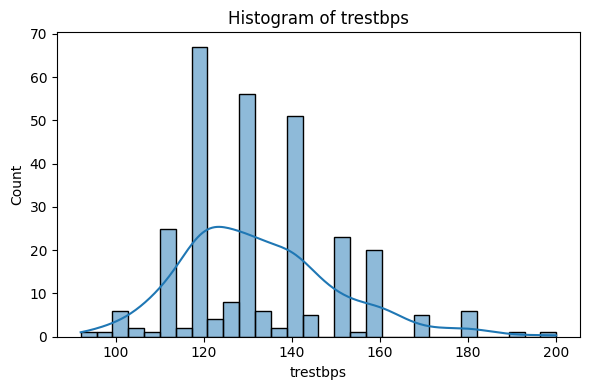

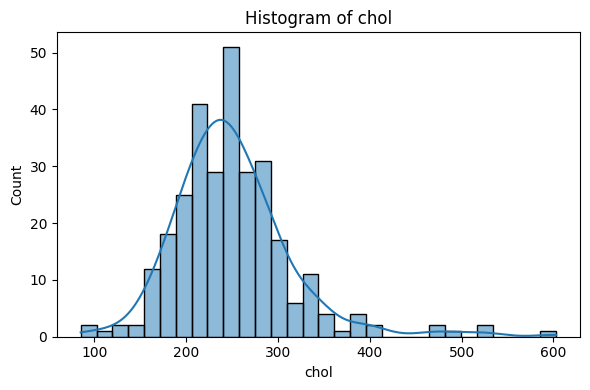

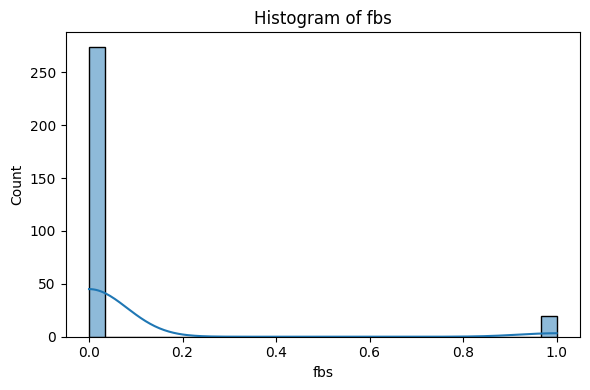

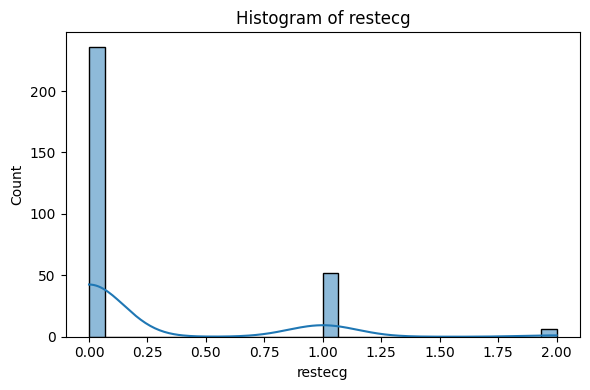

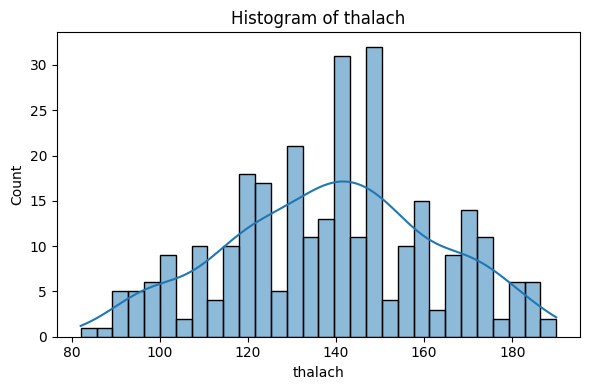

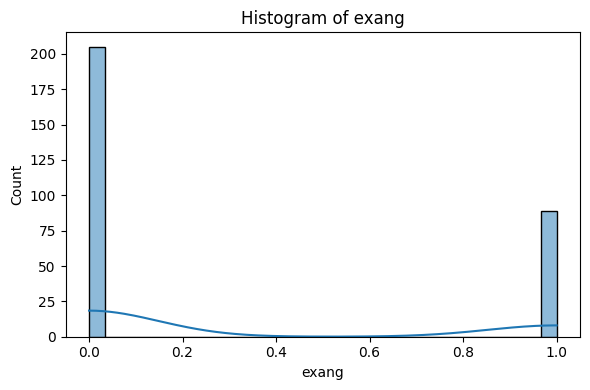

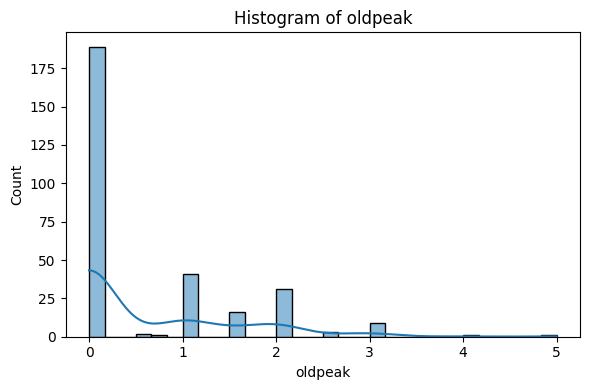

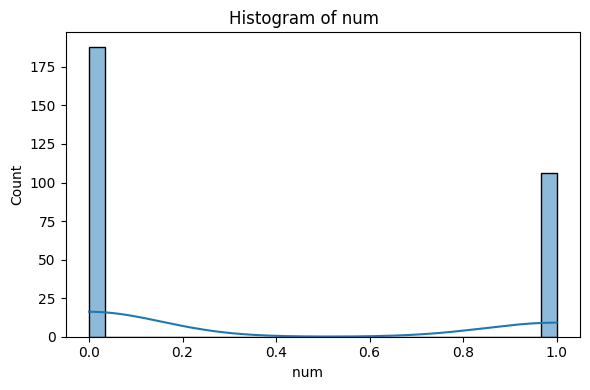

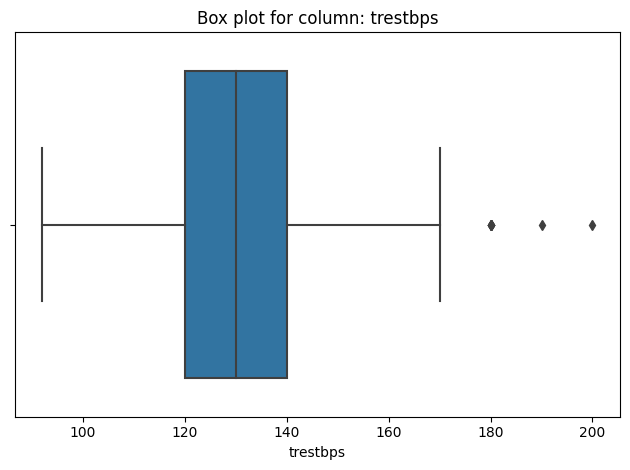

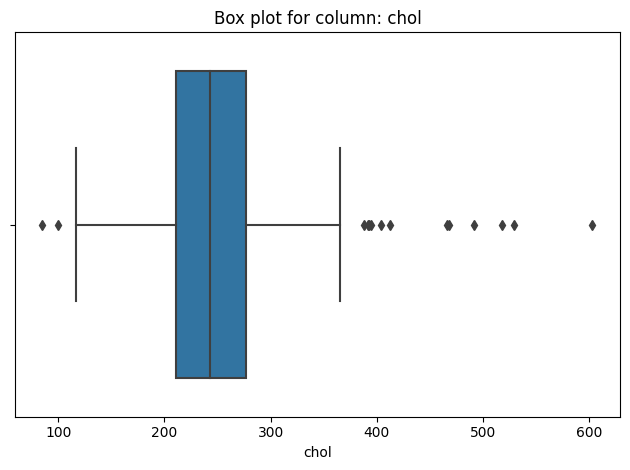

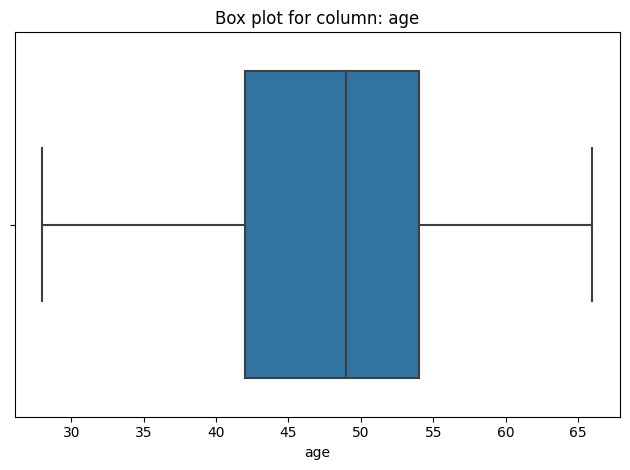

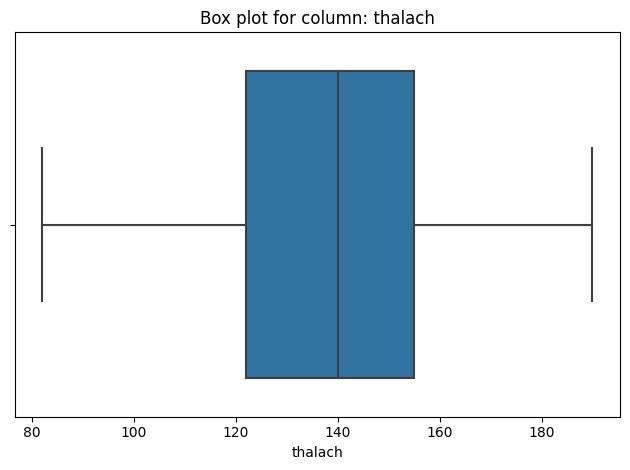

In [22]:
# Correlation heatmap
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#ploting Histogram for every column 

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numeric_columns[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

#plotting boxplot 
cols = ['trestbps', 'chol' , 'age' , "thalach"]
for i in cols:
    sns.boxplot(x=df[i])
    plt.title(f"Box plot for column: {i}")
    plt.tight_layout()
    plt.show()


In [28]:

X = df.drop(['num       '] , axis = 1)
y = df['num       ']



In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size = 0.3)


In [31]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

models = {
    'Logistic': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC()
}


for name , model in models.items():
    model.fit(X_train , y_train )
    y_pred = model.predict(X_test)

    accur = accuracy_score(y_test , y_pred)
    mse = mean_squared_error(y_test , y_pred)

    print(f"Model : {name}")
    print(f"Accuracy : {accur}")
    print(f"Mean Squared Error : {mse}")
    print("= "* 10,'\n\n')

Model : Logistic
Accuracy : 0.8314606741573034
Mean Squared Error : 0.16853932584269662
= = = = = = = = = =  


Model : RandomForest
Accuracy : 0.8202247191011236
Mean Squared Error : 0.1797752808988764
= = = = = = = = = =  


Model : DecisionTree
Accuracy : 0.7528089887640449
Mean Squared Error : 0.24719101123595505
= = = = = = = = = =  


Model : SVM
Accuracy : 0.8426966292134831
Mean Squared Error : 0.15730337078651685
= = = = = = = = = =  




🔍 Confusion Matrix for SVM:
[[55  6]
 [ 8 20]]


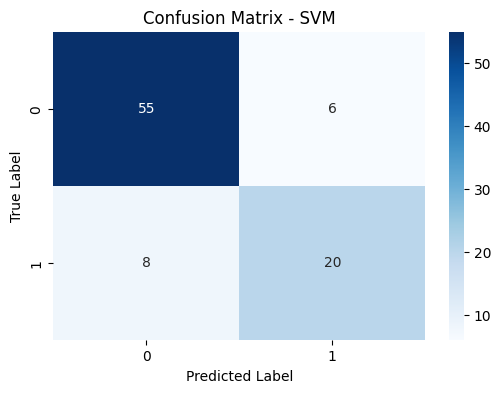

In [42]:
from sklearn.metrics import confusion_matrix

# Predict again using SVM (or reuse if you saved y_pred from SVM)
svm_model = models['SVM']
y_pred_svm = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("🔍 Confusion Matrix for SVM:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()